In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib

from scipy.spatial import distance as dist

In [2]:
imagem = cv2.imread("../databases/pictures/px-woman-smilings.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_RGB2BGR)


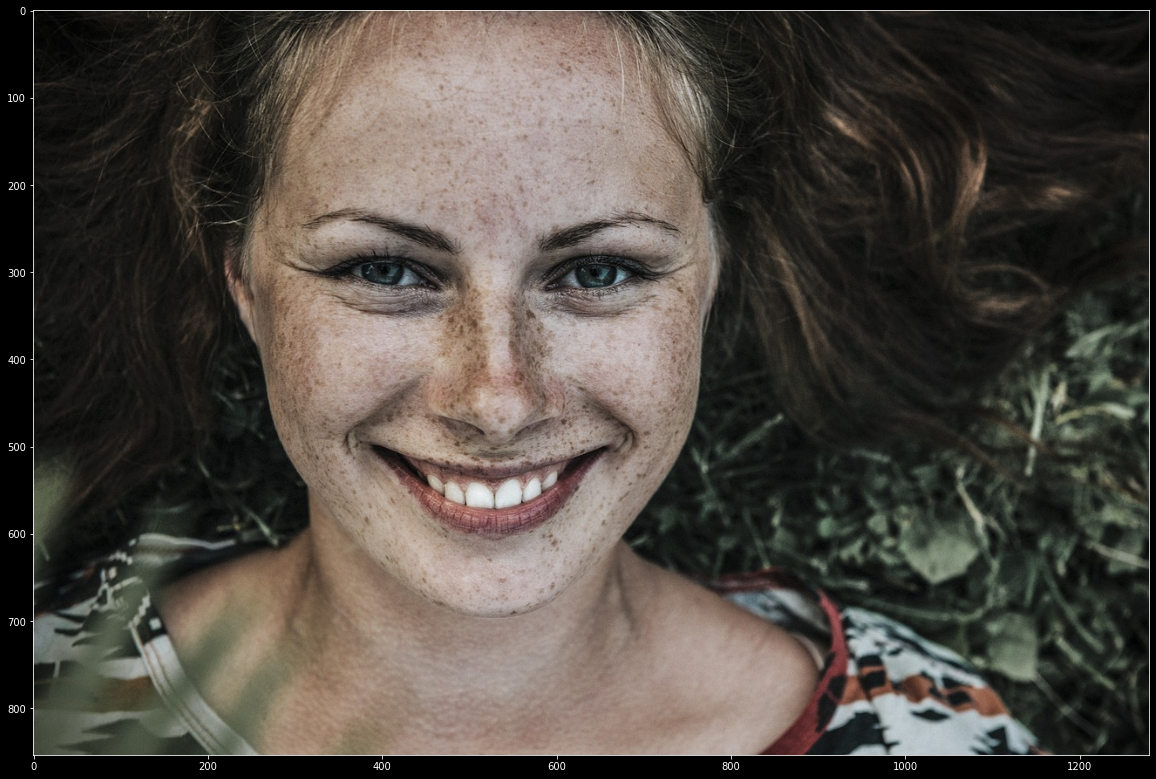

In [5]:
plt.figure(figsize=(20, 20))
plt.imshow(imagem)


In [7]:
classificador_dlib_68_path = "classificadores/shape_predictor_68_face_landmarks.dat"
classificador_dlib = dlib.shape_predictor(classificador_dlib_68_path)
detector_face = dlib.get_frontal_face_detector()


In [8]:
def anotar_rosto(imagem):
    retangulos = detector_face(imagem, 1)
    if len(retangulos) == 0:
        return None
    for k, d in enumerate(retangulos):
        print("identificado rosto " + str(k))
        cv2.rectangle(imagem, (d.left(), d.top()),
                      (d.right(), d.bottom()), (255, 255, 0), 2)

    return imagem


In [9]:
imagem_anotada = imagem.copy()
imagem_anotada = anotar_rosto(imagem_anotada)

identificado rosto 0


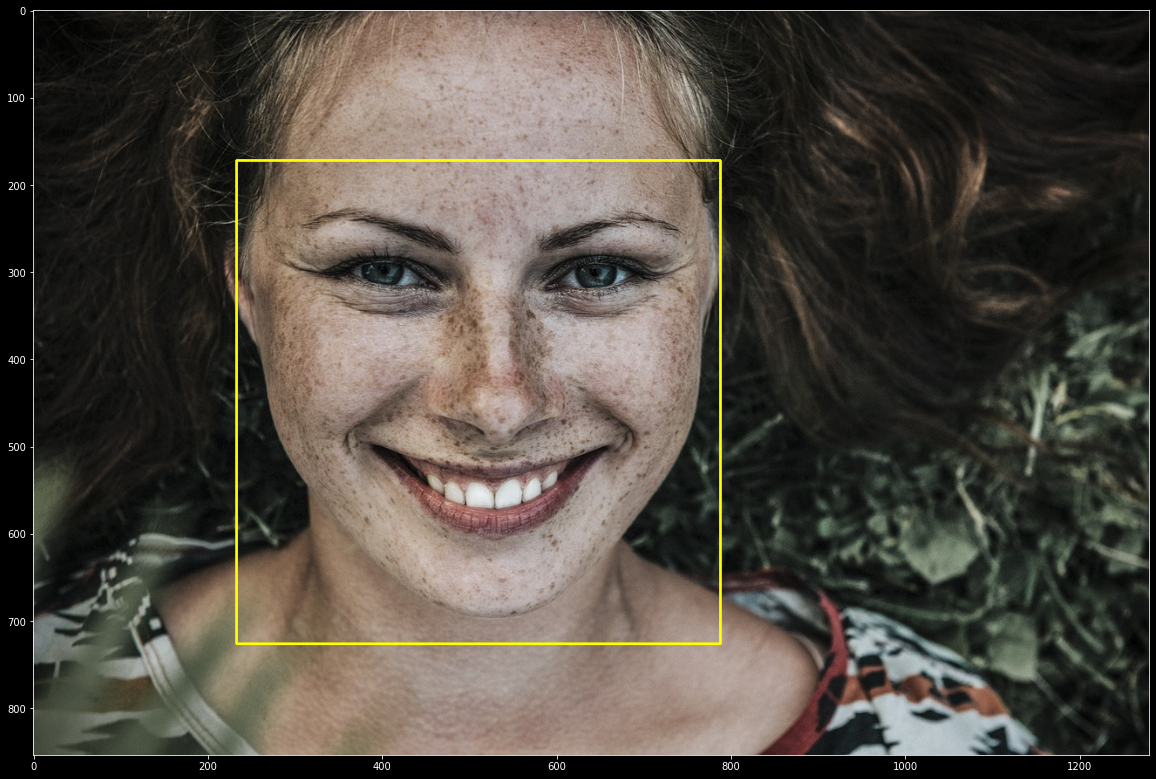

In [11]:
plt.figure(figsize=(20, 20))
plt.imshow(imagem_anotada)


<h1>Macos Facias</h1>
<span style="color: yellow">Rosto</span>: <strong>18 ao 68</strong></br>
<span style="color: yellow">Lábios</span>: <strong>48 ao 61</strong></br>
<span style="color: yellow">Sobrancelha Direita</span>: <strong>18 ao 22</strong></br>
<span style="color: yellow">Sobrancelha Esquerta</span>: <strong>23 ao 27</strong></br>
<span style="color: yellow">Olho Esquerdo</span>: <strong>37 ao 42</strong></br>
<span style="color: yellow">Olho Direito</span>: <strong>43 ao 48</strong></br>

In [12]:
def pontos_marcos_faciais(imagem):
    retangulos = detector_face(imagem, 1)

    if len(retangulos) == 0:
        return None
    marcos = []
    for ret in retangulos:
        marcos.append(np.matrix([[p.x, p.y]
                                 for p in classificador_dlib(imagem, ret).parts()]))
    return marcos


In [13]:
marcos_faciais = pontos_marcos_faciais(imagem)

In [14]:
# quantidade de face dentro da imagem
len(marcos_faciais)

1

In [16]:
# 68 pontos esperados
len(marcos_faciais[0])

68

In [17]:
def anotar_marcos_faciais(imagem, marcos):
    for marco in marcos:
        for idx, ponto in enumerate(marco):
            centro = (ponto[0, 0], ponto[0, 1])
            cv2.circle(imagem, centro, 3, (255, 255, 0), -1)
            cv2.putText(imagem, str(idx), centro,
                        cv2.FONT_HERSHEY_COMPLEX, 0.8, (255, 255, 255), 2)
    return imagem


In [20]:
imagem_anotada = imagem.copy()
imagem_anotada = anotar_marcos_faciais(imagem_anotada, marcos_faciais)


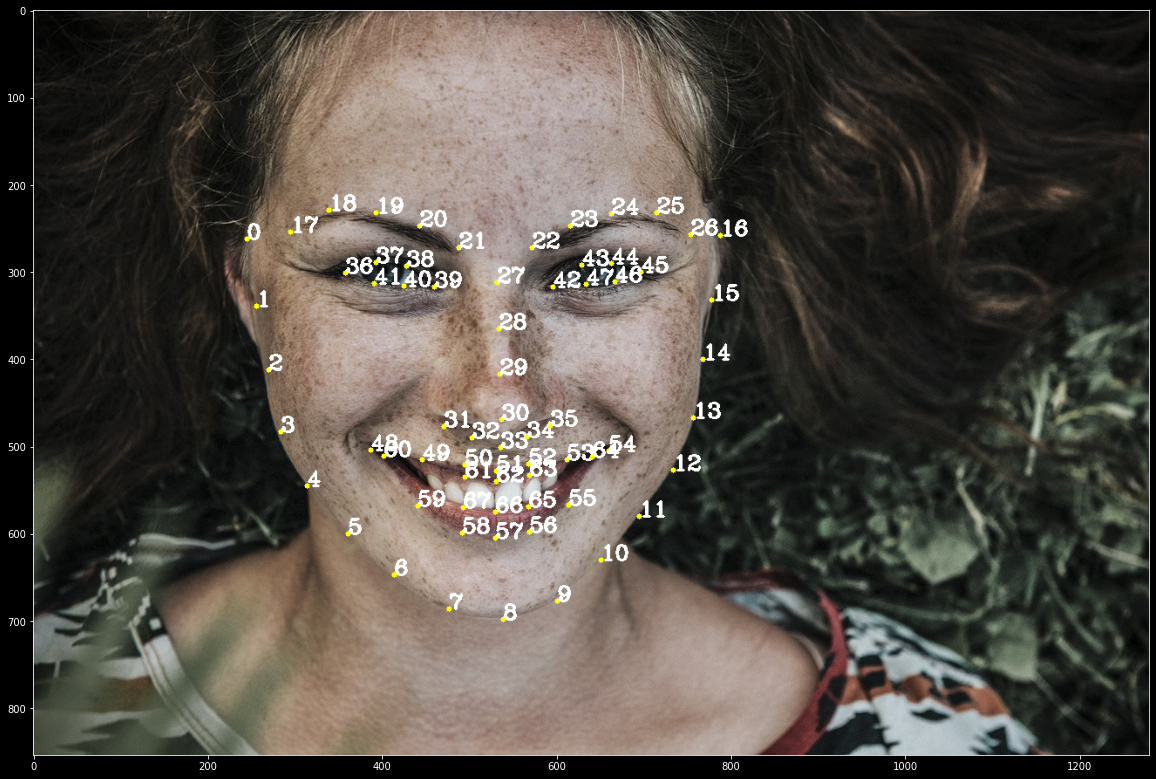

In [21]:
plt.figure(figsize=(20, 20))
plt.imshow(imagem_anotada)

In [22]:
FACE = list(range(17, 68))
FACE_COMPLETA = list(range(0, 68))
LABIO = list(range(48, 61))
SOBRANCELHA_DIREITA = list(range(17, 22))
SOBRANCELHA_ESQUERDA = list(range(22, 27))
OLHO_DIREITO = list(range(36, 42))
OLHO_ESQUERDO = list(range(42, 48))
NARIZ = list(range(27, 35))
MANDIBULA = list(range(0, 17))

<h1 style="color: yellow">Calcular Medida de Razão</h1>

In [29]:
def aspecto_razao_olhos(pontos_olhos):
    a = dist.euclidean(pontos_olhos[1], pontos_olhos[5])
    b = dist.euclidean(pontos_olhos[2], pontos_olhos[4])
    c = dist.euclidean(pontos_olhos[0], pontos_olhos[3])
    aspecto_razao = (a + b) / (2.0 * c)
    return aspecto_razao


In [30]:
def anotar_marcos_casca_convexa(imagem, marcos):
    retangulos = detector_face(imagem, 1)

    if len(retangulos) == 0:
        return None

    for idx, ret in enumerate(retangulos):
        marco = marcos[idx]

        ponto = cv2.convexHull(marco[OLHO_ESQUERDO])
        cv2.drawContours(imagem, [ponto], 0, (255, 255, 0), 2)

        ponto = cv2.convexHull(marco[OLHO_DIREITO])
        cv2.drawContours(imagem, [ponto], 0, (255, 255, 0), 2)
    return imagem


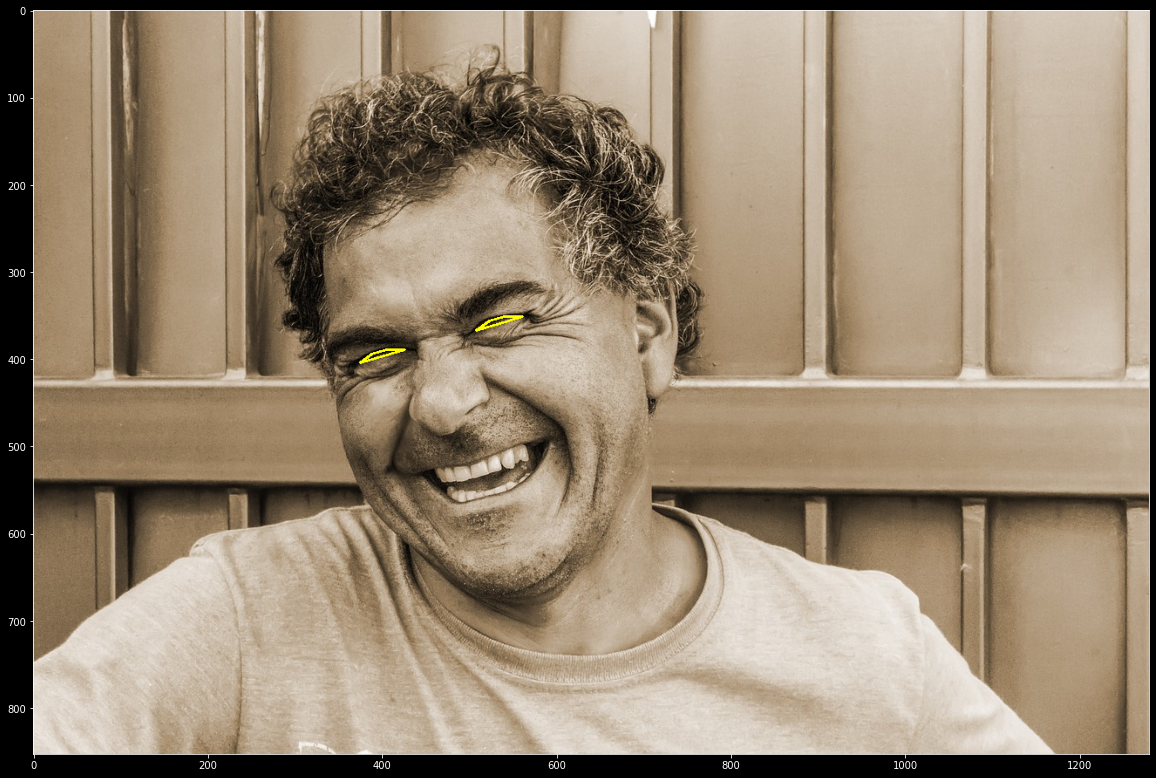

In [32]:
imagem_pessoa = cv2.imread("../databases/pictures/px-man-happy.jpg")
imagem_pessoa = cv2.cvtColor(imagem_pessoa, cv2.COLOR_RGB2BGR)
imagem_anotada_pessoa = imagem_pessoa.copy()
marcos_faciais = pontos_marcos_faciais(imagem_anotada_pessoa)
imagem_anotada_pessoa = anotar_marcos_casca_convexa(imagem_anotada_pessoa, marcos_faciais)

plt.figure(figsize=(20, 20))
plt.imshow(imagem_anotada_pessoa)

In [34]:
valor_olho_esquerto = aspecto_razao_olhos(marcos_faciais[0][OLHO_ESQUERDO])
valor_olho_direito = aspecto_razao_olhos(marcos_faciais[0][OLHO_DIREITO])

print("Valor Aspecto de Razão Esquerdo ==> {}".format(valor_olho_esquerto))
print("Valor Aspecto de Razão Direito ==> {}".format(valor_olho_direito))

Valor Aspecto de Razão Esquerdo ==> 0.21450051712603885
Valor Aspecto de Razão Direito ==> 0.22895527127621407


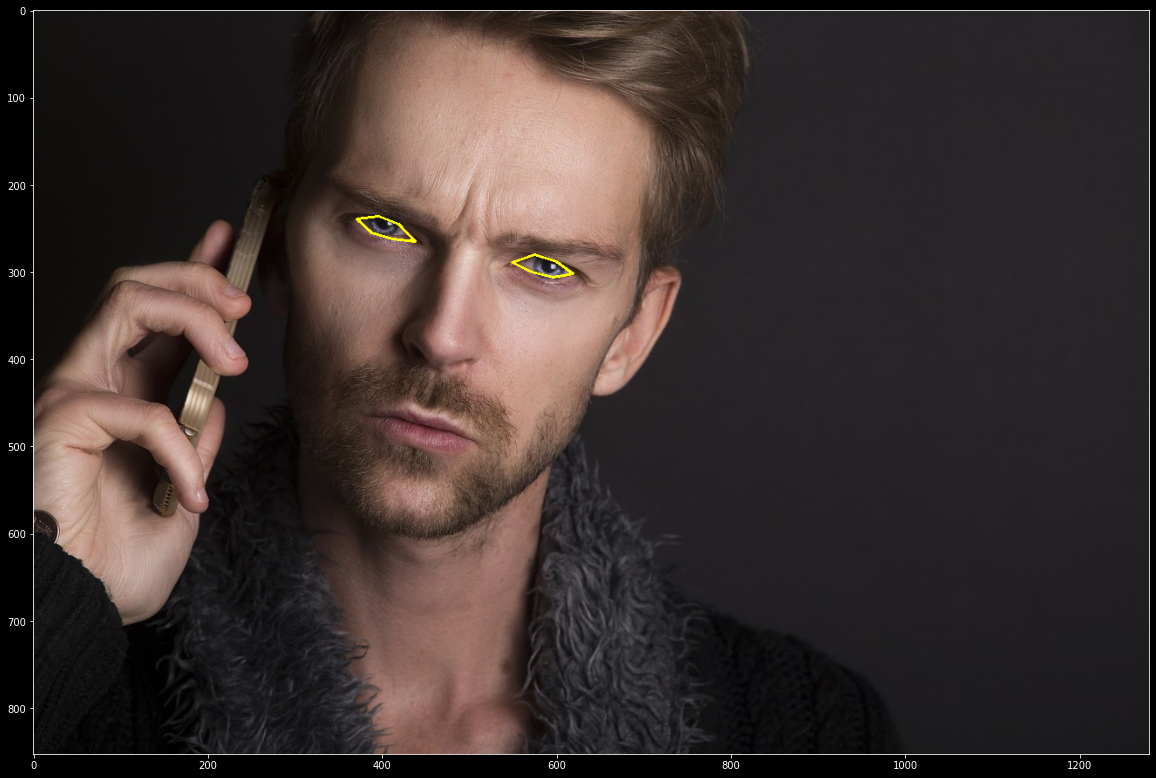

In [35]:
imagem_serious = cv2.imread("../databases/pictures/px-man-serious.jpg")
imagem_serious = cv2.cvtColor(imagem_serious, cv2.COLOR_RGB2BGR)
imagem_anotada_serious = imagem_serious.copy()
marcos_faciais = pontos_marcos_faciais(imagem_anotada_serious)
imagem_anotada_serious = anotar_marcos_casca_convexa(imagem_anotada_serious, marcos_faciais)

plt.figure(figsize=(20, 20))
plt.imshow(imagem_anotada_serious)

In [36]:
valor_olho_esquerto = aspecto_razao_olhos(marcos_faciais[0][OLHO_ESQUERDO])
valor_olho_direito = aspecto_razao_olhos(marcos_faciais[0][OLHO_DIREITO])

print("Valor Aspecto de Razão Esquerdo ==> {}".format(valor_olho_esquerto))
print("Valor Aspecto de Razão Direito ==> {}".format(valor_olho_direito))

Valor Aspecto de Razão Esquerdo ==> 0.2715204726310253
Valor Aspecto de Razão Direito ==> 0.27133313866169434
